<a href="https://colab.research.google.com/github/OJBright/Machine-Learning/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML INTRO LESSON 1

In [ ]:
#Save the anthropometric data
!pwd
!ls

/content
drive  sample_data


In [ ]:
#Finding out where the data is located
!pwd
!ls

#Save the anthropometric data
from google.colab import drive
drive.mount('/content/drive')
!mv anthropometric_trait_gwas.csv /content/drive/MyDrive/



/content
drive  sample_data
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mv: cannot stat 'anthropometric_trait_gwas.csv': No such file or directory


In [ ]:
!pwd
%cd /content/drive/MyDrive/Anthropometric_Data/
!ls

/content
/content/drive/MyDrive/Anthropometric_Data


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/anthropometric_trait_gwas.csv')
data

,age,sex,cohort,systolic_BP,diastolic_BP,LDL_cholesterol,HDL_cholesterol,height,weight,BMI,...,SNP_991,SNP_992,SNP_993,SNP_994,SNP_995,SNP_996,SNP_997,SNP_998,SNP_999,SNP_1000
0,56,Male,Ugandan,118.002747,84.264252,162.624051,40.742849,1.82,79.9,24.121483,...,2,1,1,1,2,2,0,2,1,1
1,69,Male,Zulu,136.989197,76.344685,114.354831,51.891454,1.84,90.5,26.730860,...,1,2,2,0,0,0,1,0,2,0
2,46,Male,Zulu,125.901988,81.773698,155.910738,46.008973,1.89,73.7,20.632121,...,1,1,1,1,1,2,1,1,0,1
3,32,Female,Ugandan,127.833587,75.676216,122.402092,48.024370,1.60,48.7,19.023438,...,1,1,2,1,1,0,1,0,0,2
4,60,Male,Zulu,115.295104,92.281726,93.632389,74.678976,1.92,100.2,27.180990,...,2,1,1,1,1,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,Female,Ugandan,129.687699,75.627514,113.306936,29.592177,1.61,59.3,22.877204,...,2,1,1,2,1,1,1,0,0,1
996,64,Male,Zulu,139.671781,86.463956,101.231992,69.297920,1.83,93.5,27.919615,...,1,0,2,1,2,2,0,2,0,0
997,62,Female,Zulu,124.939774,68.325829,139.817775,51.528076,1.60,74.7,29.179688,...,0,1,0,1,1,0,0,2,0,0
998,35,Male,Ugandan,126.376524,71.258623,103.083569,56.964574,1.86,86.8,25.089606,...,2,1,2,2,2,2,0,2,2,0


In [ ]:
# Select only clinical data (excluding SNP columns)
clinical_data = data.loc[:, ~data.columns.str.startswith('SNP_')]

# Display the first few rows
print(clinical_data.head())

   age     sex   cohort  systolic_BP  diastolic_BP  LDL_cholesterol  \
0   56    Male  Ugandan   118.002747     84.264252       162.624051   
1   69    Male     Zulu   136.989197     76.344685       114.354831   
2   46    Male     Zulu   125.901988     81.773698       155.910738   
3   32  Female  Ugandan   127.833587     75.676216       122.402092   
4   60    Male     Zulu   115.295104     92.281726        93.632389   

   HDL_cholesterol  height  weight        BMI  waist_circumference  \
0        40.742849    1.82    79.9  24.121483                 89.4   
1        51.891454    1.84    90.5  26.730860                108.6   
2        46.008973    1.89    73.7  20.632121                100.4   
3        48.024370    1.60    48.7  19.023438                 91.8   
4        74.678976    1.92   100.2  27.180990                110.9   

   hip_circumference       WHR  
0               88.2  1.013605  
1              104.6  1.038241  
2               99.9  1.005005  
3               94.5

In [ ]:
# Filter data for Ugandans
ugandan_data = clinical_data[clinical_data['cohort'] == 'Ugandan']

# Display the clinical data for Ugandans
print(ugandan_data)

     age     sex   cohort  systolic_BP  diastolic_BP  LDL_cholesterol  \
0     56    Male  Ugandan   118.002747     84.264252       162.624051   
3     32  Female  Ugandan   127.833587     75.676216       122.402092   
6     38    Male  Ugandan   122.241252     75.326410       137.935186   
7     56  Female  Ugandan   120.789641     75.453933       159.249218   
9     40    Male  Ugandan   136.590543     86.486701       174.202356   
..   ...     ...      ...          ...           ...              ...   
987   43    Male  Ugandan   126.686477    104.618959       146.720309   
990   24  Female  Ugandan   118.421625     78.092690       135.270245   
995   60  Female  Ugandan   129.687699     75.627514       113.306936   
998   35    Male  Ugandan   126.376524     71.258623       103.083569   
999   55    Male  Ugandan   137.418223     86.889139       166.445025   

     HDL_cholesterol  height  weight        BMI  waist_circumference  \
0          40.742849    1.82    79.9  24.121483    

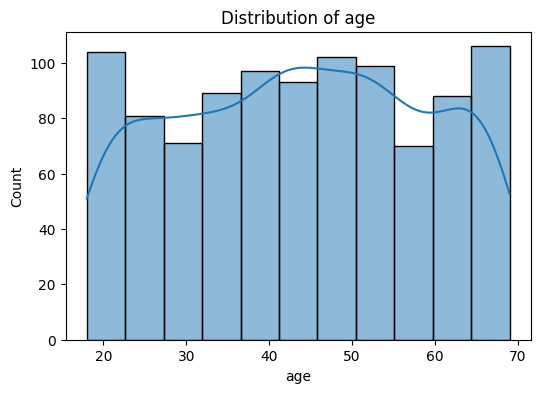

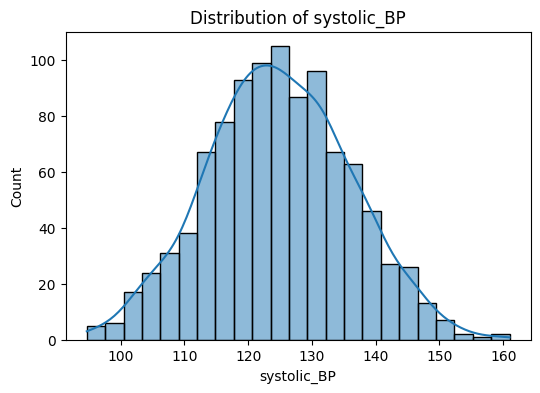

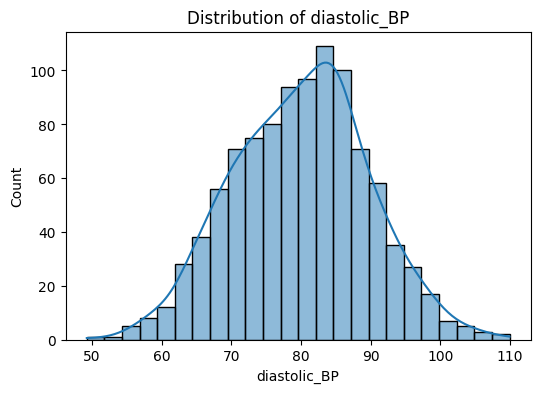

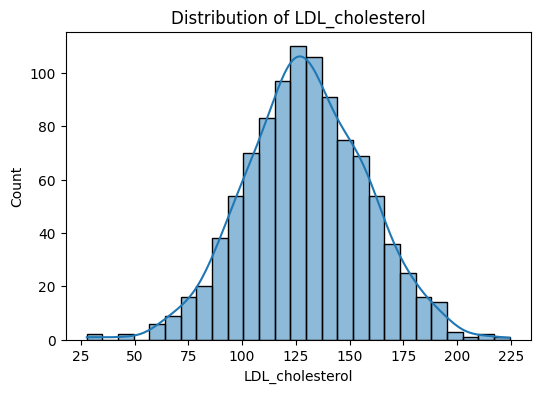

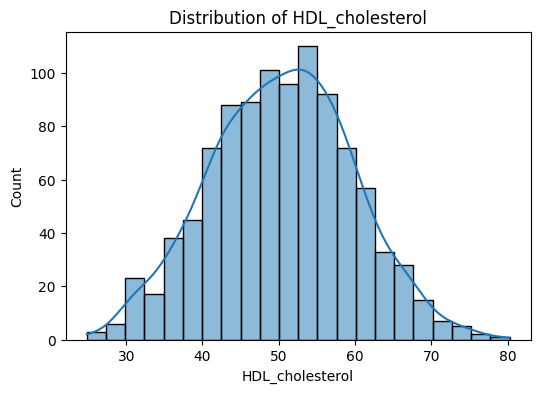

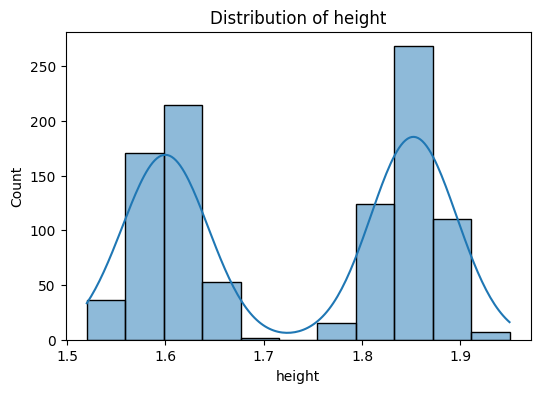

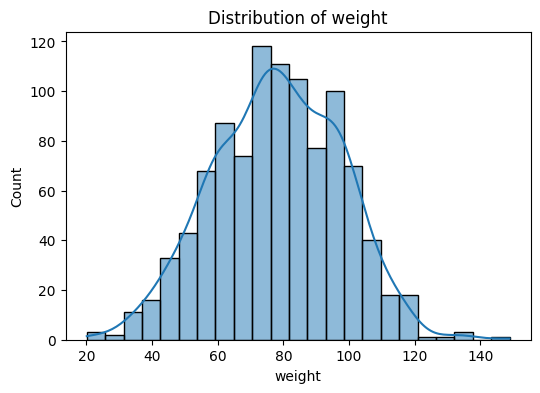

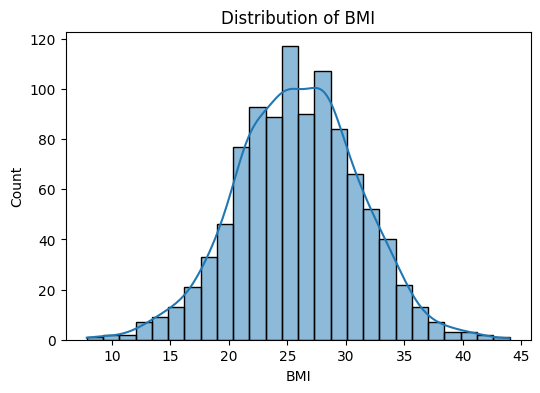

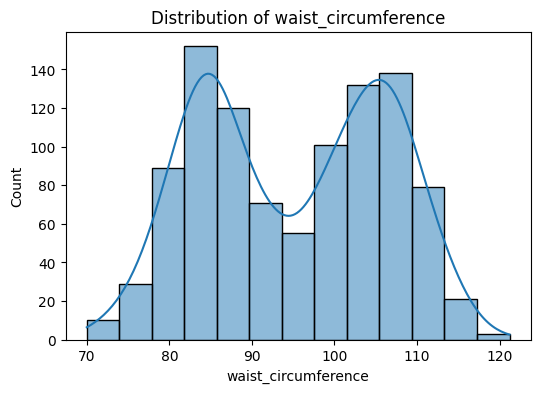

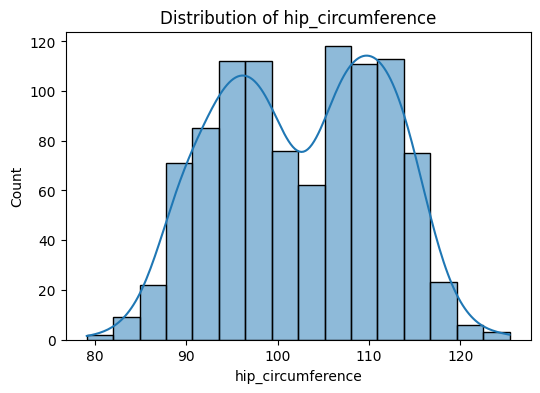

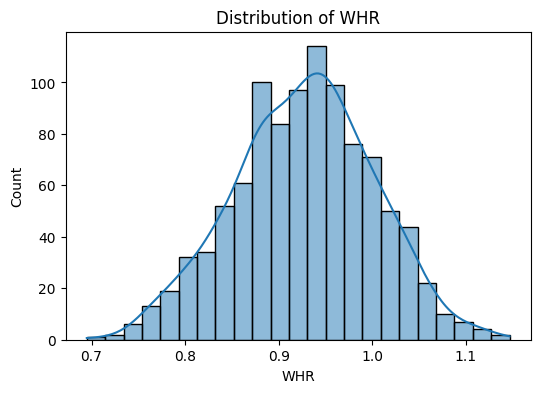

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in clinical_data.columns:
    if clinical_data[column].dtype != 'object':  # Exclude categorical columns
        plt.figure(figsize=(6, 4))
        sns.histplot(clinical_data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

In [ ]:
#check how many columns are in the clinical data file
len(clinical_data.columns)

13

In [ ]:
# Step 1: Identify and remove outliers for all numeric columns, and count them
numeric_cols = clinical_data.select_dtypes(include=['float64', 'int64']).columns

# Function to calculate IQR, remove outliers, and count them
def remove_outliers_and_count(df, cols):
    df_no_outliers = df.copy()
    outlier_counts = {}  # Store outlier counts for each column
    for col in cols:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df_no_outliers[(df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound)]
        outlier_counts[col] = len(outliers)  # Store outlier count

        # Remove outliers
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

    return df_no_outliers, outlier_counts

# Remove outliers and get the counts
clinical_data, outlier_counts = remove_outliers_and_count(clinical_data, numeric_cols)

# Print the outlier counts for each column
for column, count in outlier_counts.items():
    print(f"Column '{column}': {count} outliers")

Column 'age': 0 outliers
Column 'systolic_BP': 4 outliers
Column 'diastolic_BP': 4 outliers
Column 'LDL_cholesterol': 8 outliers
Column 'HDL_cholesterol': 2 outliers
Column 'height': 0 outliers
Column 'weight': 3 outliers
Column 'BMI': 9 outliers
Column 'waist_circumference': 0 outliers
Column 'hip_circumference': 0 outliers
Column 'WHR': 4 outliers


In [ ]:
#Total number of outliers
total_outliers = sum(outlier_counts.values())
print(f"Total number of outliers identified: {total_outliers}")

Total number of outliers identified: 34


In [ ]:
#View the data after outlier removal, how many individuals are highlighted as outliers
clinical_data

,age,sex,cohort,systolic_BP,diastolic_BP,LDL_cholesterol,HDL_cholesterol,height,weight,BMI,waist_circumference,hip_circumference,WHR
0,56,Male,Ugandan,118.002747,84.264252,162.624051,40.742849,1.82,79.9,24.121483,89.4,88.2,1.013605
1,69,Male,Zulu,136.989197,76.344685,114.354831,51.891454,1.84,90.5,26.730860,108.6,104.6,1.038241
2,46,Male,Zulu,125.901988,81.773698,155.910738,46.008973,1.89,73.7,20.632121,100.4,99.9,1.005005
3,32,Female,Ugandan,127.833587,75.676216,122.402092,48.024370,1.60,48.7,19.023438,91.8,94.5,0.971429
4,60,Male,Zulu,115.295104,92.281726,93.632389,74.678976,1.92,100.2,27.180990,110.9,107.0,1.036449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,Female,Ugandan,129.687699,75.627514,113.306936,29.592177,1.61,59.3,22.877204,75.0,92.3,0.812568
996,64,Male,Zulu,139.671781,86.463956,101.231992,69.297920,1.83,93.5,27.919615,99.4,103.3,0.962246
997,62,Female,Zulu,124.939774,68.325829,139.817775,51.528076,1.60,74.7,29.179688,109.6,113.6,0.964789
998,35,Male,Ugandan,126.376524,71.258623,103.083569,56.964574,1.86,86.8,25.089606,84.3,101.5,0.830542


In [ ]:
#View the data after outlier removal, how many individuals are highlighted as outliers
clinical_data

,age,sex,cohort,systolic_BP,diastolic_BP,LDL_cholesterol,HDL_cholesterol,height,weight,BMI,waist_circumference,hip_circumference,WHR
0,56,Male,Ugandan,118.002747,84.264252,162.624051,40.742849,1.82,79.9,24.121483,89.4,88.2,1.013605
1,69,Male,Zulu,136.989197,76.344685,114.354831,51.891454,1.84,90.5,26.730860,108.6,104.6,1.038241
2,46,Male,Zulu,125.901988,81.773698,155.910738,46.008973,1.89,73.7,20.632121,100.4,99.9,1.005005
3,32,Female,Ugandan,127.833587,75.676216,122.402092,48.024370,1.60,48.7,19.023438,91.8,94.5,0.971429
4,60,Male,Zulu,115.295104,92.281726,93.632389,74.678976,1.92,100.2,27.180990,110.9,107.0,1.036449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,Female,Ugandan,129.687699,75.627514,113.306936,29.592177,1.61,59.3,22.877204,75.0,92.3,0.812568
996,64,Male,Zulu,139.671781,86.463956,101.231992,69.297920,1.83,93.5,27.919615,99.4,103.3,0.962246
997,62,Female,Zulu,124.939774,68.325829,139.817775,51.528076,1.60,74.7,29.179688,109.6,113.6,0.964789
998,35,Male,Ugandan,126.376524,71.258623,103.083569,56.964574,1.86,86.8,25.089606,84.3,101.5,0.830542
